In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

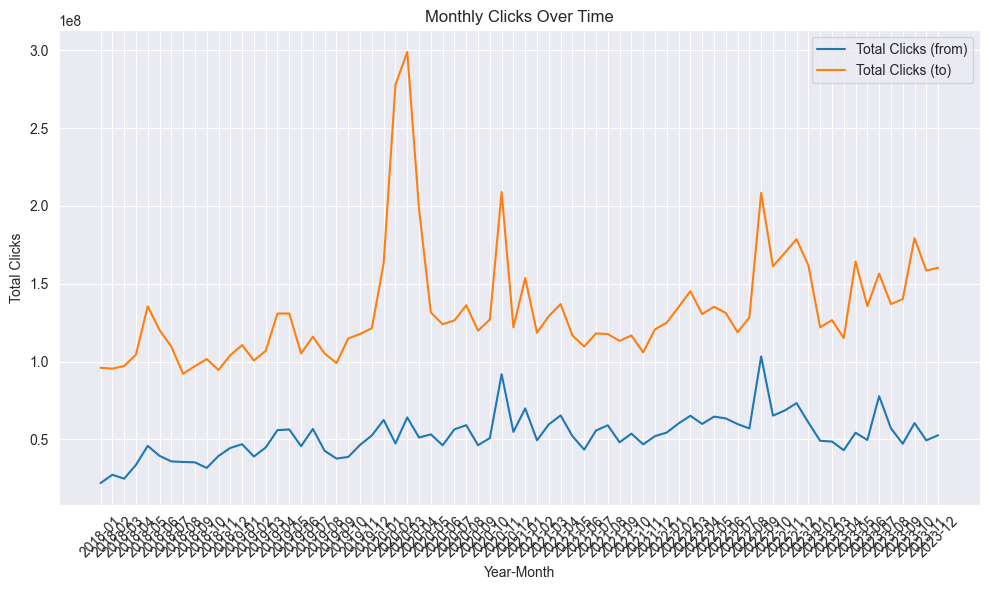

In [87]:
# Load the results.csv file
file_path = 'result.csv'
df = pd.read_csv(file_path)

# Extract the year and month from the 'file' column
df[['year', 'month']] = df['file'].str.extract(r'(\d{4})-(\d{2})\.tsv\.gz')

# Convert 'year' and 'month' columns to integers
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df = df[df['url'] != 'Main_Page']
df = df[df['url'] != 'Hyphen-minus']

# Group by year-month and sum the clicks
monthly_clicks = df.groupby(['year', 'month']).sum()

# Plot the time series
plt.figure(figsize=(10, 6))
# Combine the levels of MultiIndex for proper conversion to string
monthly_clicks.index = monthly_clicks.index.map(lambda x: f"{x[0]}-{x[1]:02}")
plt.plot(monthly_clicks.index, monthly_clicks['fromClicks'], label='Total Clicks (from)')
plt.plot(monthly_clicks.index, monthly_clicks['toClicks'], label='Total Clicks (to)')

plt.title('Monthly Clicks Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Clicks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

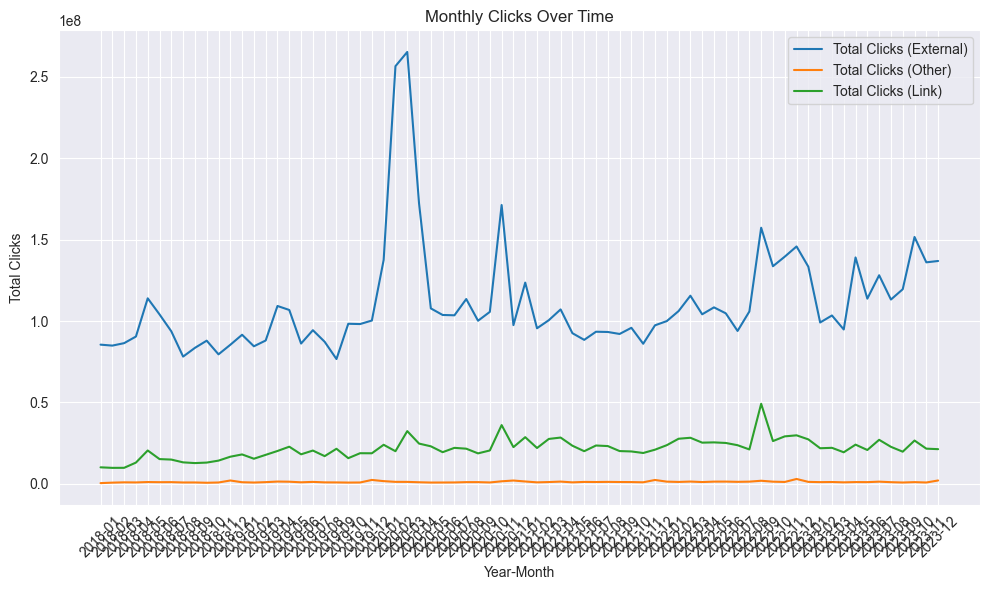

In [89]:
# Load the results.csv file
file_path = 'result.csv'
df = pd.read_csv(file_path)

# Extract the year and month from the 'file' column
df[['year', 'month']] = df['file'].str.extract(r'(\d{4})-(\d{2})\.tsv\.gz')

# Convert 'year' and 'month' columns to integers
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

df = df[df['url'] != 'Main_Page']
df = df[df['url'] != 'Hyphen-minus']

# Group by year-month and sum the clicks
monthly_clicks = df.groupby(['year', 'month']).sum()

# Plot the time series
plt.figure(figsize=(10, 6))
# Combine the levels of MultiIndex for proper conversion to string
monthly_clicks.index = monthly_clicks.index.map(lambda x: f"{x[0]}-{x[1]:02}")
plt.plot(monthly_clicks.index, monthly_clicks['toClicksExternal'], label='Total Clicks (External)')
plt.plot(monthly_clicks.index, monthly_clicks['toClicksOther'], label='Total Clicks (Other)')
plt.plot(monthly_clicks.index, monthly_clicks['toClicksLink'], label='Total Clicks (Link)')

plt.title('Monthly Clicks Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Clicks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

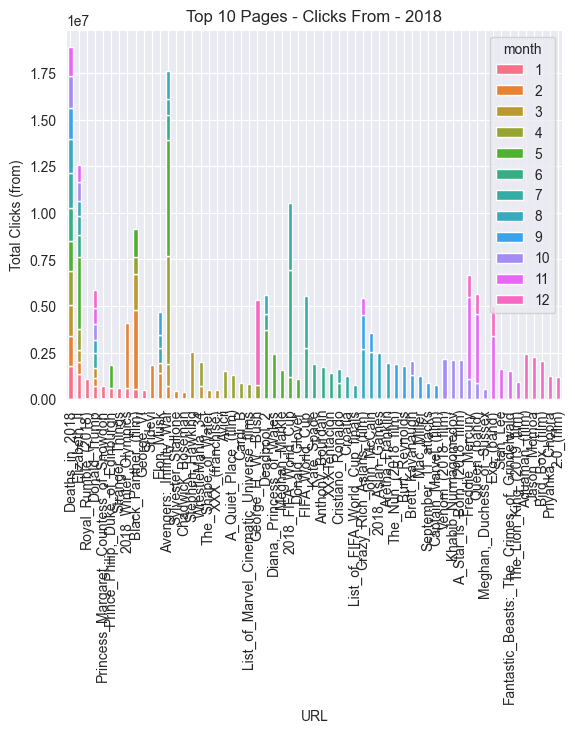

<Figure size 640x480 with 0 Axes>

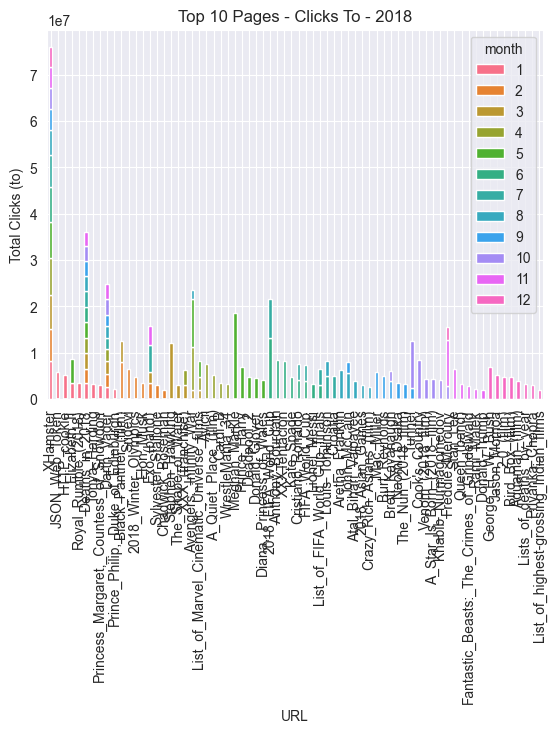

<Figure size 640x480 with 0 Axes>

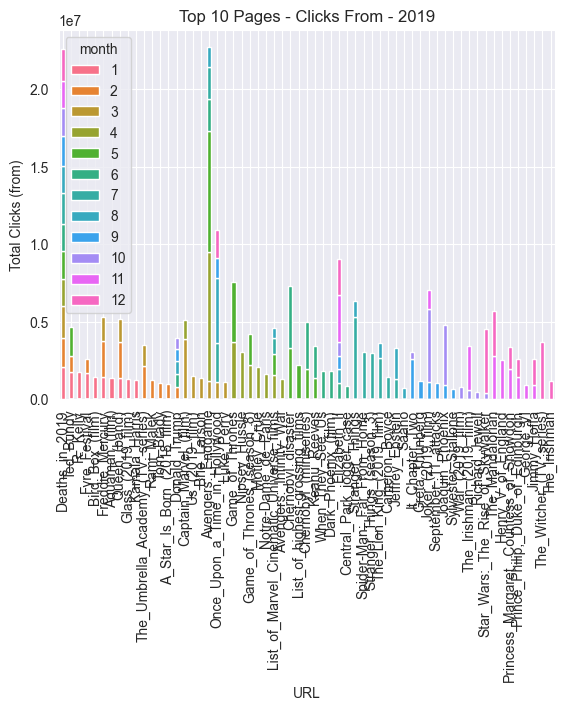

<Figure size 640x480 with 0 Axes>

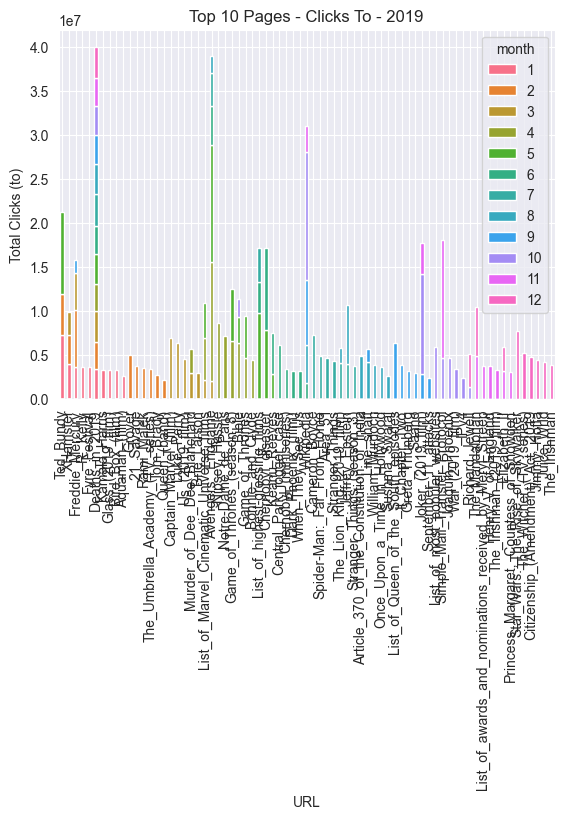

<Figure size 640x480 with 0 Axes>

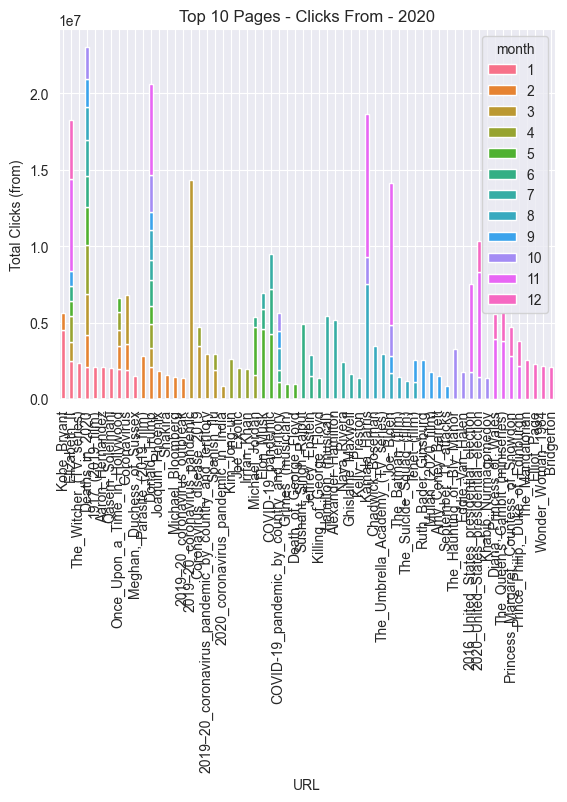

<Figure size 640x480 with 0 Axes>

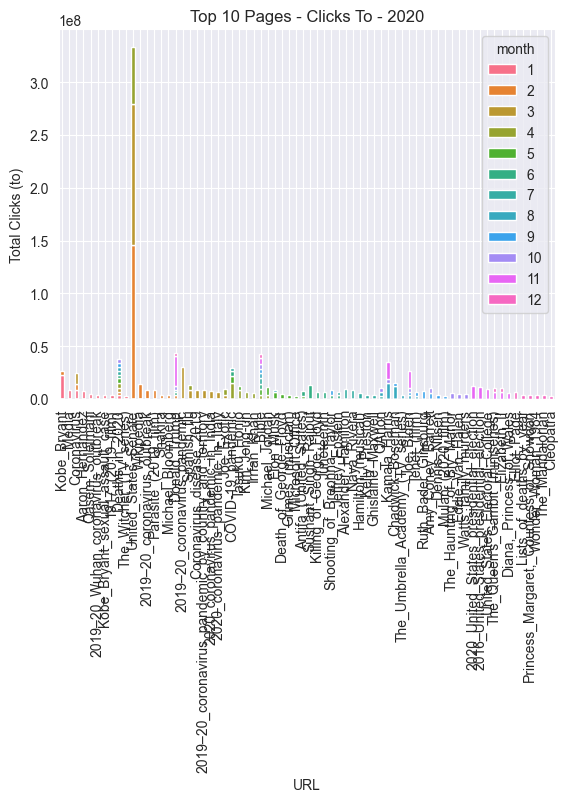

<Figure size 640x480 with 0 Axes>

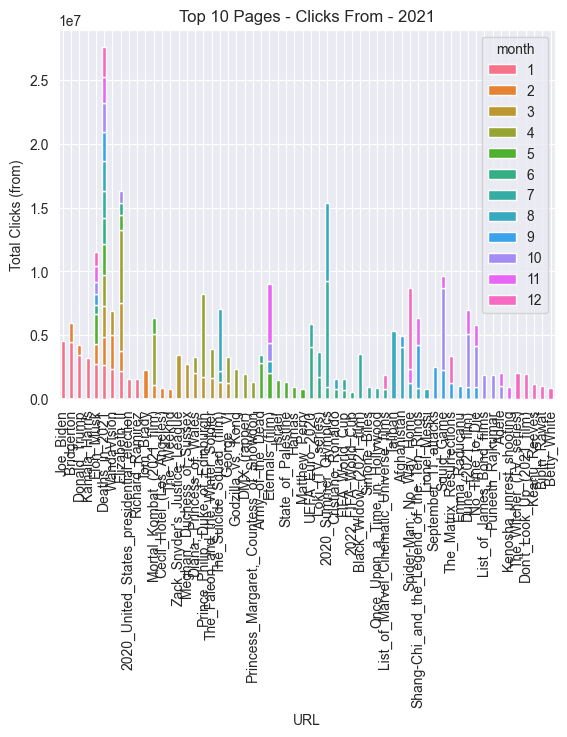

<Figure size 640x480 with 0 Axes>

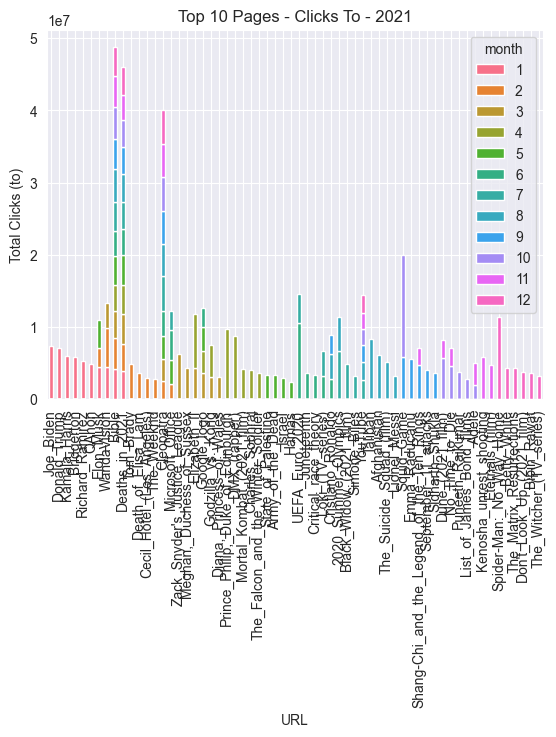

<Figure size 640x480 with 0 Axes>

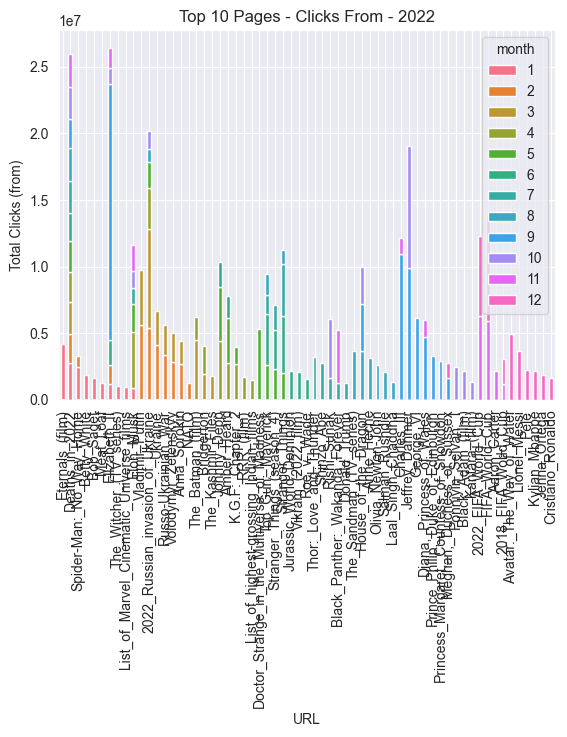

<Figure size 640x480 with 0 Axes>

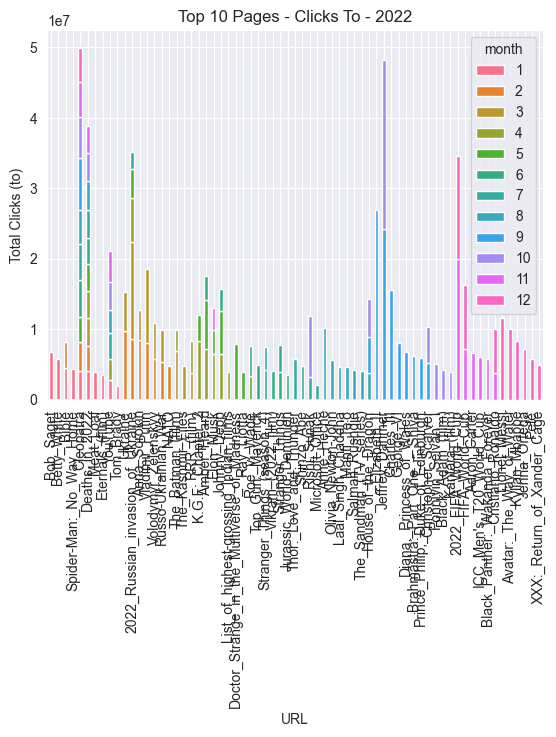

<Figure size 640x480 with 0 Axes>

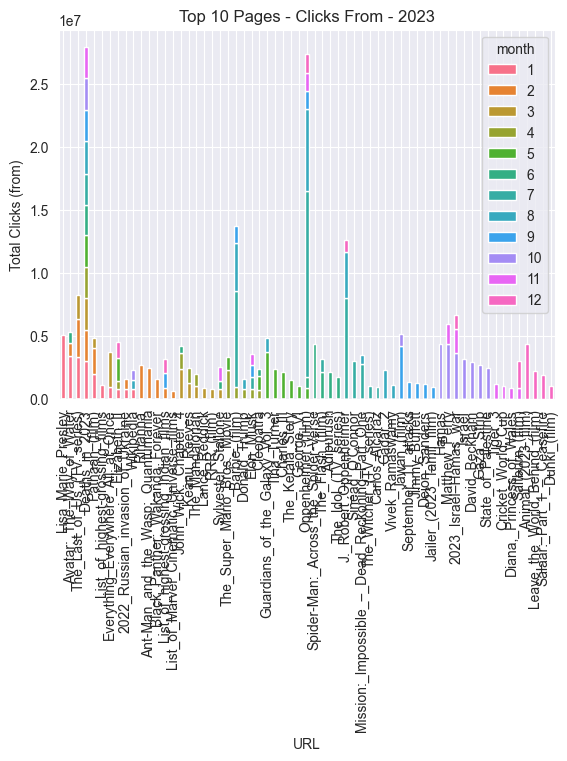

<Figure size 640x480 with 0 Axes>

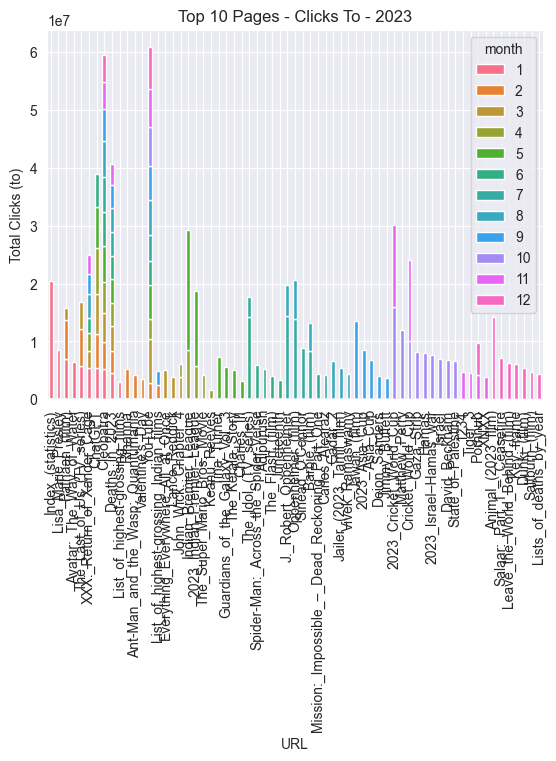

In [86]:
# Load the results.csv file
file_path = 'result.csv'
df = pd.read_csv(file_path)

%matplotlib inline
top_n = 10

# Extract 'year' and 'month' from the 'file' column
df[['year', 'month']] = df['file'].str.extract(r'(\d{4})-(\d{2})\.tsv\.gz')

# Convert 'year' and 'month' columns to integers
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

# Filter out URLs
df = df[df['url'] != 'Main_Page']
df = df[df['url'] != 'Hyphen-minus']

# Define a color palette for each month
palette = sns.color_palette("husl", n_colors=df['month'].nunique())

# Loop through each year and create a layered bar chart for each month
for year in df['year'].unique():
    yearly_df = df[df['year'] == year]

    if not yearly_df.empty:
        # Group by 'url' and 'month', summing up 'fromClicks' and 'toClicks'
        monthly_totals = yearly_df.groupby(['url', 'month'])[['fromClicks', 'toClicks']].sum()

        # Top N pages with the highest clicks 'from' and 'to' for each month
        top_from_pages_monthly = monthly_totals.groupby('month')['fromClicks'].nlargest(top_n).reset_index(level=0, drop=True)
        top_to_pages_monthly = monthly_totals.groupby('month')['toClicks'].nlargest(top_n).reset_index(level=0, drop=True)

        # Plotting
        # Bar chart for clicks 'from'
        plt.figure()
        top_from_pages_monthly.unstack().plot(kind='bar', stacked=True, color=palette)
        plt.title(f'Top {top_n} Pages - Clicks From - {year}')
        plt.xlabel('URL')
        plt.ylabel('Total Clicks (from)')

        # Bar chart for clicks 'to'
        plt.figure()
        top_to_pages_monthly.unstack().plot(kind='bar', stacked=True, color=palette)
        plt.title(f'Top {top_n} Pages - Clicks To - {year}')
        plt.xlabel('URL')
        plt.ylabel('Total Clicks (to)')

        plt.show()